# pysedm tutorial | From a ccd trace to a spectrum
How to create a spectrum from scratch (assuming you created the tracematch before)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In [3]:
import pysedm

# 1. Load the CCD and the TraceMatcher

In [4]:
night = "20180309"

In [5]:
tmap  = pysedm.io.load_nightly_tracematch(night)

TypeError: OLDER FORMAT NOT AVAILABLE FOR THE MOMENT. WILL BE SOON. (If urgent contact Mickael) 

In [49]:
ccd   = pysedm.ccd.get_ccd( pysedm.io.get_night_files(night,"ccd.crr","11_36_2")[0], tracematch=tmap, background=0) 

In [50]:
ccd.fetch_background()

We are going to analyze trace 820 for it contains some standard star light

<IPython.core.display.Javascript object>


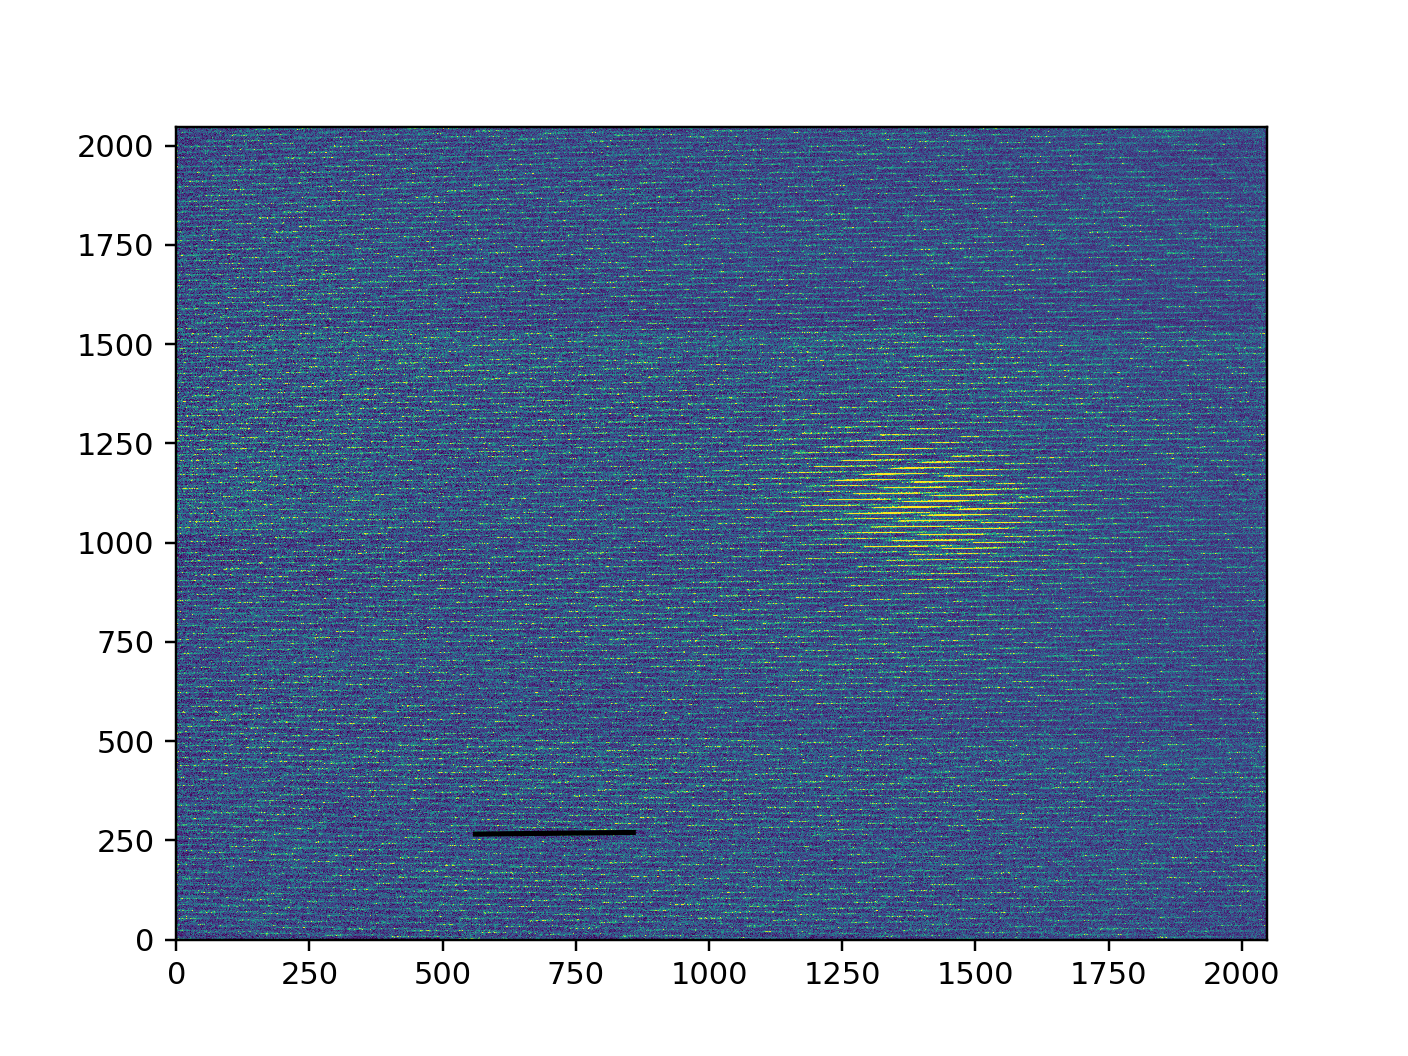

In [66]:
spaxelid = 235
fig = mpl.figure()
ax  = fig.add_subplot(111)
pl = ccd.show(ax=ax)
ccd.tracematch.display_traces(ax,spaxelid)

# 2. Build the Wavelength solution for this very spaxel

### 1. Load the Arclamps

In [67]:
Cd = pysedm.ccd.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Cd")[0], tracematch=tmap, background=0)
Hg = pysedm.ccd.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Hg")[0], tracematch=tmap, background=0)
Xe = pysedm.ccd.get_ccd(pysedm.io.get_night_files(night,"ccd.lamp","Xe")[0], tracematch=tmap, background=0)

### 2. Build the WaveSolution object (enables to fit)

In [68]:
from pysedm import wavesolution

In [69]:
wsol_full = wavesolution.get_wavesolution(Hg,Xe,Cd)

and fit the wavelength solution

In [70]:
# Basic fit parameters
wavedegree=4
contdegree=3

wsol_full.fit_wavelesolution(traceindex=spaxelid, saveplot=None, show=False, 
                             contdegree=contdegree,wavedegree=wavedegree)


/Users/mrigault/anaconda3/lib/python3.6/site-packages/pysedm-0.8.7-py3.6.egg/pysedm/wavesolution.py:1657: UserWarning: line 8280.01 skiped since Xe loaded
  warnings.warn("line %s skiped since %s loaded"%(k,v["backup"]))


Let's see how it looks like

<IPython.core.display.Javascript object>


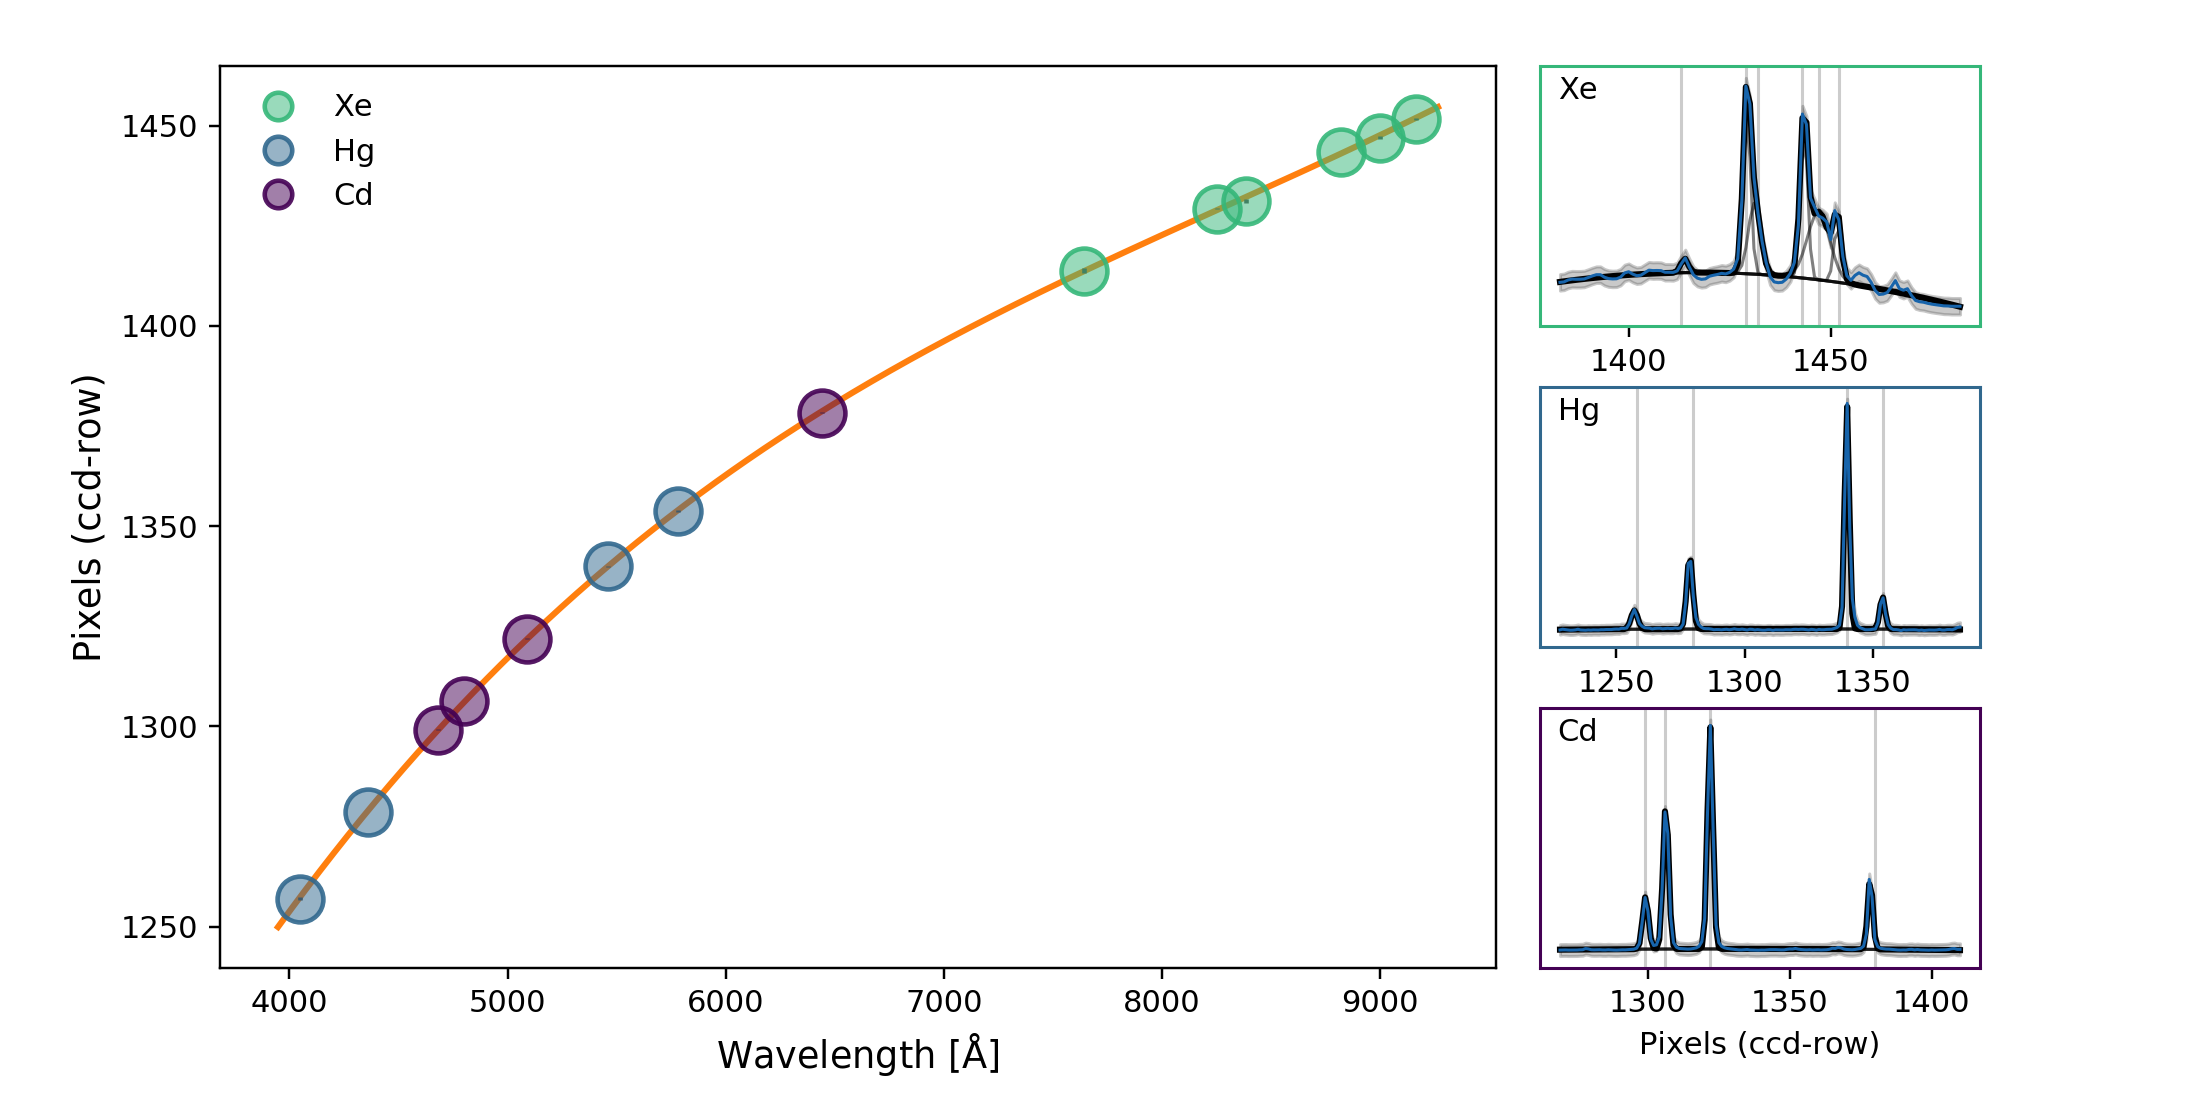

In [71]:
wsol_full._wsol.show(show_guesses=True)

Seems just fine !

# 3. Use the wavelength solution to extract a wavelength calibrated spectra

In [29]:
spec = ccd.extract_spectrum(spaxelid, wsol_full, lbda=pysedm.sedm.SEDM_LBDA)

<IPython.core.display.Javascript object>


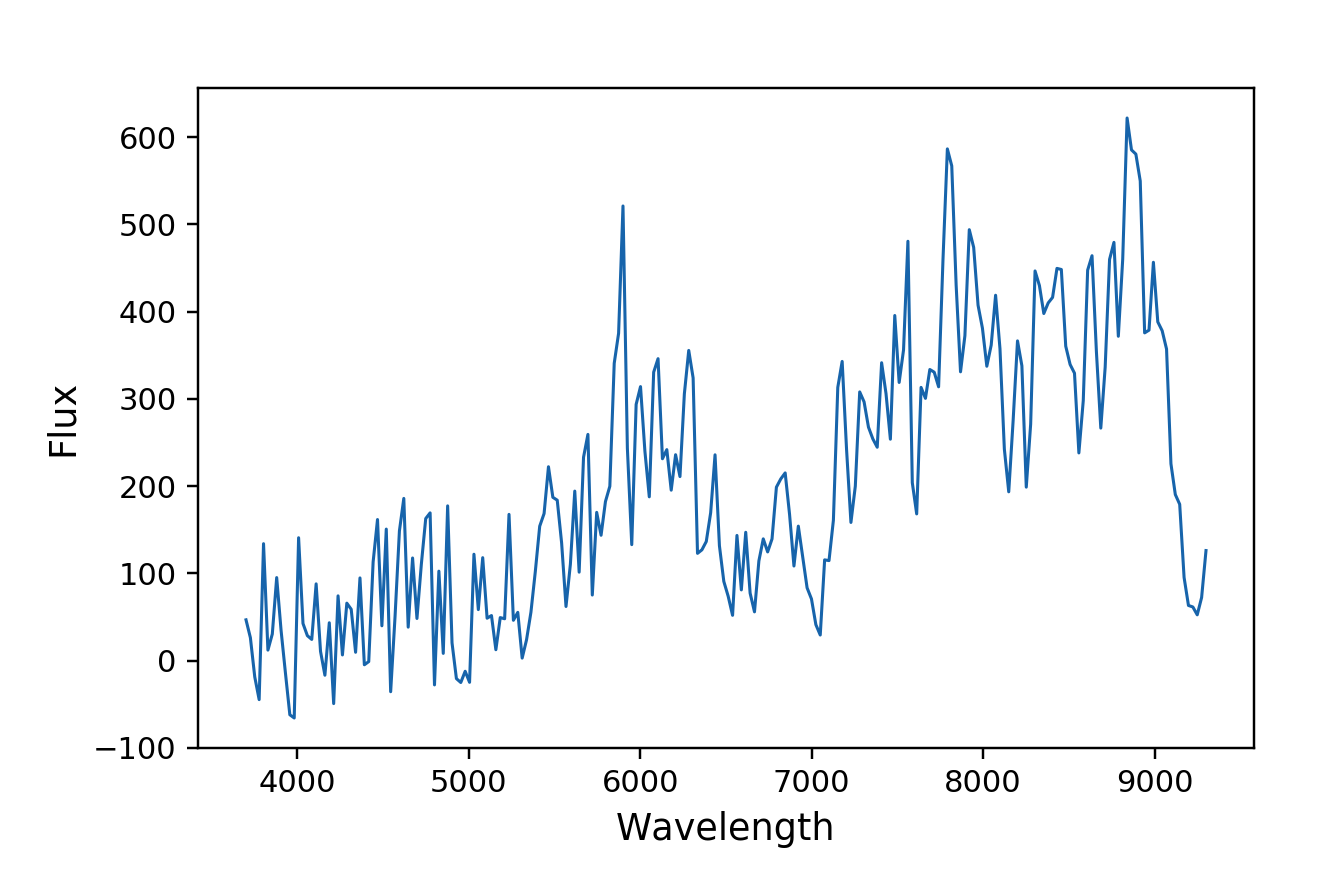

{'ax': <matplotlib.axes._axes.Axes at 0x1057eb518>,
 'fig': <matplotlib.figure.Figure at 0x1c0ba05da0>,
 'plot': ([<matplotlib.lines.Line2D at 0x1c0b30ef28>], None)}

In [30]:
spec.show()

### Let's Compare this new spectrum with a wavelength calibrated Telluric Lines

In [2]:
import pyifu
specb = pyifu.load_spectrum("/Users/mrigault/Libraries/pysedm/data/Data/KPNO_lines.fits")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mrigault/Libraries/pysedm/data/Data/KPNO_lines.fits'

In [1]:
from scipy.ndimage.filters import gaussian_filter 

pl = spec.show()
filter_in_pix = 60 / specb.header["CDELT1"]/ np.sqrt(2)
axt = pl["ax"].twinx()
axt.plot(specb.lbda, 1-gaussian_filter(specb.data,filter_in_pix), color="C1", lw=1, ls="-")


NameError: name 'spec' is not defined

# 5. Now Test this with another `spaxelid` now that everything is loaded

### 1. Select your new spaxel id (here a sky)

<IPython.core.display.Javascript object>


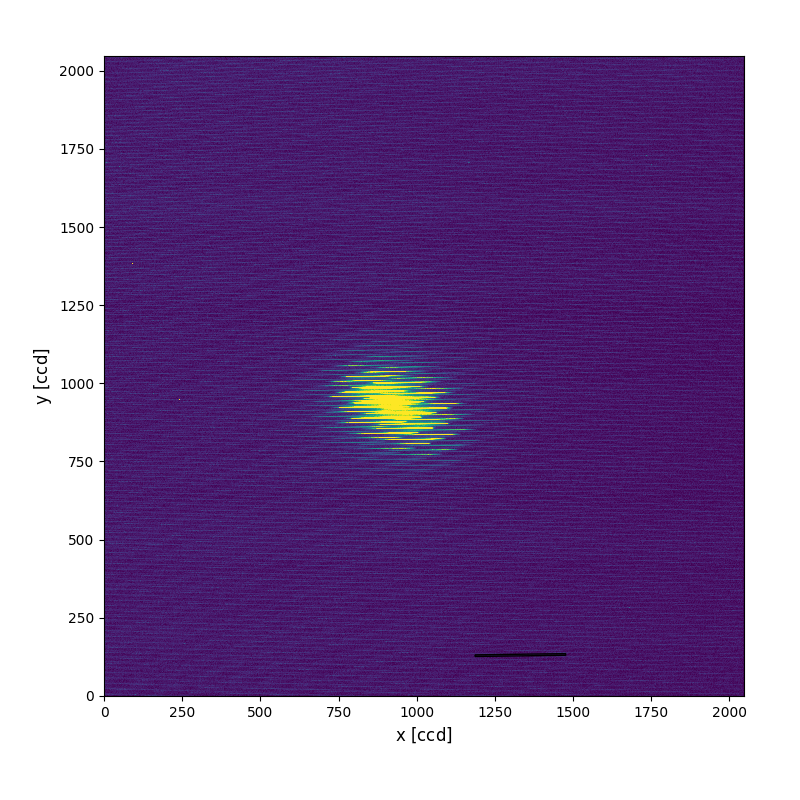

In [33]:
spaxelsky = 120
pl = ccd.show()
ccd.tracematch.display_traces(pl["ax"],spaxelsky)

### 2. Measure the wavelength solution for this spaxel

<IPython.core.display.Javascript object>


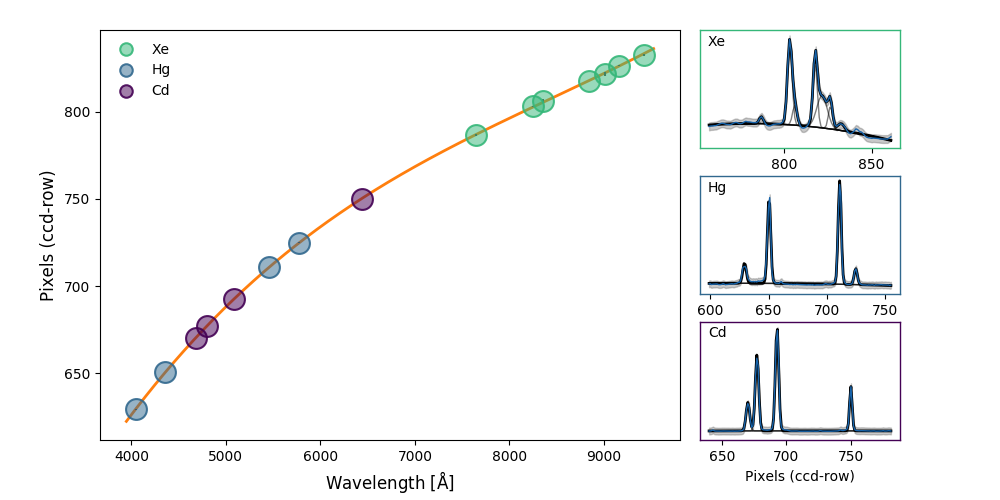

In [35]:
wsol_full.fit_wavelesolution(traceindex=spaxelsky, 
                             saveplot=None, show=False, 
                             contdegree=contdegree,wavedegree=wavedegree)
wsol_full._wsol.show()

### 3. Get the spectrum

In [43]:
specsky = ccd.extract_spectrum(spaxelsky, wsol_full, lbda=pysedm.SEDM_LBDA)

<IPython.core.display.Javascript object>


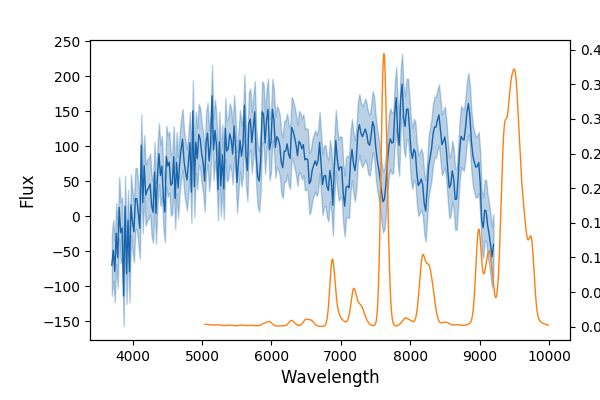

In [46]:
pl = specsky.show()

filter_in_pix = 50 / specb.header["CDELT1"]/ np.sqrt(2)
axt = pl["ax"].twinx()

axt.plot(specb.lbda, 1-gaussian_filter(specb.data,filter_in_pix), color="C1", lw=1, ls="-")

